# $R_t$ Validation: Florida

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
from IPython.display import clear_output

In [2]:
rt_url = "data/rt_Florida.csv"
rt_florida = pd.read_csv(rt_url)
rt_florida

,county,date,ML,Low_90,High_90,Low_50,High_50
0,Alachua,2020-03-19,3.00,1.01,6.99,2.04,4.45
1,Alachua,2020-03-20,2.21,0.82,4.28,1.58,3.03
2,Alachua,2020-03-21,1.90,0.76,3.62,1.39,2.59
3,Alachua,2020-03-22,1.81,0.75,3.38,1.39,2.50
4,Alachua,2020-03-23,1.75,0.74,3.20,1.29,2.32
...,...,...,...,...,...,...,...
13956,Wakulla,2021-04-17,1.00,0.37,1.68,0.78,1.32
13957,Wakulla,2021-04-18,0.98,0.34,1.64,0.77,1.31
13958,Wakulla,2021-04-19,0.98,0.35,1.65,0.72,1.25
13959,Wakulla,2021-04-20,0.98,0.34,1.63,0.74,1.27


In [3]:
miami_rt = rt_florida[(rt_florida.county == "Miami-Dade")]
miami_rt
miami_rt.to_csv("data/miami_rt.csv", index=False)

In [4]:
url_counties = (
    "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
)

timeline = pd.read_csv(url_counties)
florida = timeline[(timeline.fips >= 12000) & (timeline.fips < 13000)]
florida.to_csv("data/florida.csv", index=False)

In [5]:
miami = timeline[(timeline.fips == 12086)]
miami.to_csv("data/miami_cases.csv", index=False)

In [6]:
fl_url = "data/florida.csv"
fl_cases = pd.read_csv(fl_url)
fl_cases

,date,county,state,fips,cases,deaths
0,2020-03-01,Hillsborough,Florida,12057.0,1,0.0
1,2020-03-01,Manatee,Florida,12081.0,1,0.0
2,2020-03-02,Hillsborough,Florida,12057.0,1,0.0
3,2020-03-02,Manatee,Florida,12081.0,1,0.0
4,2020-03-03,Hillsborough,Florida,12057.0,2,0.0
...,...,...,...,...,...,...
26723,2021-04-22,Union,Florida,12125.0,1803,71.0
26724,2021-04-22,Volusia,Florida,12127.0,41814,775.0
26725,2021-04-22,Wakulla,Florida,12129.0,3370,54.0
26726,2021-04-22,Walton,Florida,12131.0,7661,87.0


In [7]:
miami.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 1207 to 1245425
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    408 non-null    object 
 1   county  408 non-null    object 
 2   state   408 non-null    object 
 3   fips    408 non-null    float64
 4   cases   408 non-null    int64  
 5   deaths  408 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 22.3+ KB


In [8]:
miami["k"] = miami["cases"].diff()
miami.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,county,state,fips,cases,deaths,k
1207,2020-03-11,Miami-Dade,Florida,12086.0,1,0.0,NaN
1418,2020-03-12,Miami-Dade,Florida,12086.0,2,0.0,1.0
1684,2020-03-13,Miami-Dade,Florida,12086.0,8,0.0,6.0
2006,2020-03-14,Miami-Dade,Florida,12086.0,8,0.0,0.0
2390,2020-03-15,Miami-Dade,Florida,12086.0,13,0.0,5.0


In [9]:
miami_rt.head()

,county,date,ML,Low_90,High_90,Low_50,High_50
7729,Miami-Dade,2020-03-15,3.00,1.01,6.99,2.04,4.45
7730,Miami-Dade,2020-03-16,2.18,0.91,3.81,1.69,2.92
7731,Miami-Dade,2020-03-17,1.93,0.90,3.24,1.55,2.54
7732,Miami-Dade,2020-03-18,1.93,0.99,3.08,1.58,2.46
7733,Miami-Dade,2020-03-19,2.00,1.12,3.03,1.69,2.49


In [10]:
miami = miami.set_index(miami["date"])
miami = miami[["county", "cases", "k", "deaths"]]
miami.tail()

,county,cases,k,deaths
date,,,,
2021-04-18,Miami-Dade,470667,1760.0,6044.0
2021-04-19,Miami-Dade,471594,927.0,6049.0
2021-04-20,Miami-Dade,472940,1346.0,6058.0
2021-04-21,Miami-Dade,474068,1128.0,6059.0
2021-04-22,Miami-Dade,475230,1162.0,6077.0


In [11]:
# miami.drop(miami.head(4).index, inplace=True)

In [12]:
miami = miami.merge(miami_rt, left_on="date", right_on="date")
miami = miami.drop(["county_y"], axis=1)

In [13]:
miami = miami.rename(columns={"county_x": "county"})

In [14]:
miami.tail()

,date,county,cases,k,deaths,ML,Low_90,High_90,Low_50,High_50
398,2021-04-17,Miami-Dade,468907,1444.0,6043.0,0.98,0.83,1.13,0.94,1.07
399,2021-04-18,Miami-Dade,470667,1760.0,6044.0,0.96,0.81,1.11,0.92,1.05
400,2021-04-19,Miami-Dade,471594,927.0,6049.0,0.93,0.78,1.08,0.89,1.02
401,2021-04-20,Miami-Dade,472940,1346.0,6058.0,0.90,0.76,1.07,0.85,0.98
402,2021-04-21,Miami-Dade,474068,1128.0,6059.0,0.87,0.73,1.04,0.82,0.95


In [15]:
miami

,date,county,cases,k,deaths,ML,Low_90,High_90,Low_50,High_50
0,2020-03-15,Miami-Dade,13,5.0,0.0,3.00,1.01,6.99,2.04,4.45
1,2020-03-16,Miami-Dade,23,10.0,0.0,2.18,0.91,3.81,1.69,2.92
2,2020-03-17,Miami-Dade,43,20.0,0.0,1.93,0.90,3.24,1.55,2.54
3,2020-03-18,Miami-Dade,77,34.0,0.0,1.93,0.99,3.08,1.58,2.46
4,2020-03-19,Miami-Dade,101,24.0,0.0,2.00,1.12,3.03,1.69,2.49
...,...,...,...,...,...,...,...,...,...,...
398,2021-04-17,Miami-Dade,468907,1444.0,6043.0,0.98,0.83,1.13,0.94,1.07
399,2021-04-18,Miami-Dade,470667,1760.0,6044.0,0.96,0.81,1.11,0.92,1.05
400,2021-04-19,Miami-Dade,471594,927.0,6049.0,0.93,0.78,1.08,0.89,1.02
401,2021-04-20,Miami-Dade,472940,1346.0,6058.0,0.90,0.76,1.07,0.85,0.98


<AxesSubplot:>

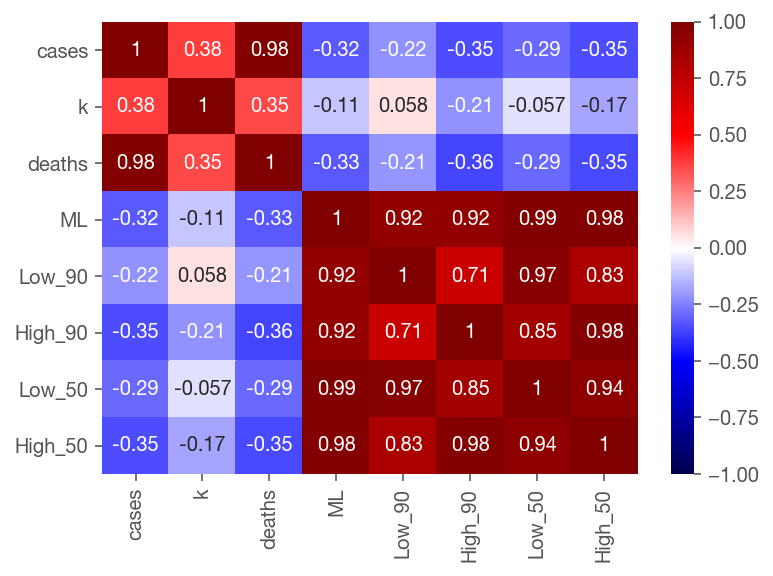

In [16]:
# Visualizing correlation with Seaborn
# sns.set(rc={"figure.figsize": (30, 21)})
# sns.set(font_scale=1.5)  # crazy big
sns.heatmap(miami.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

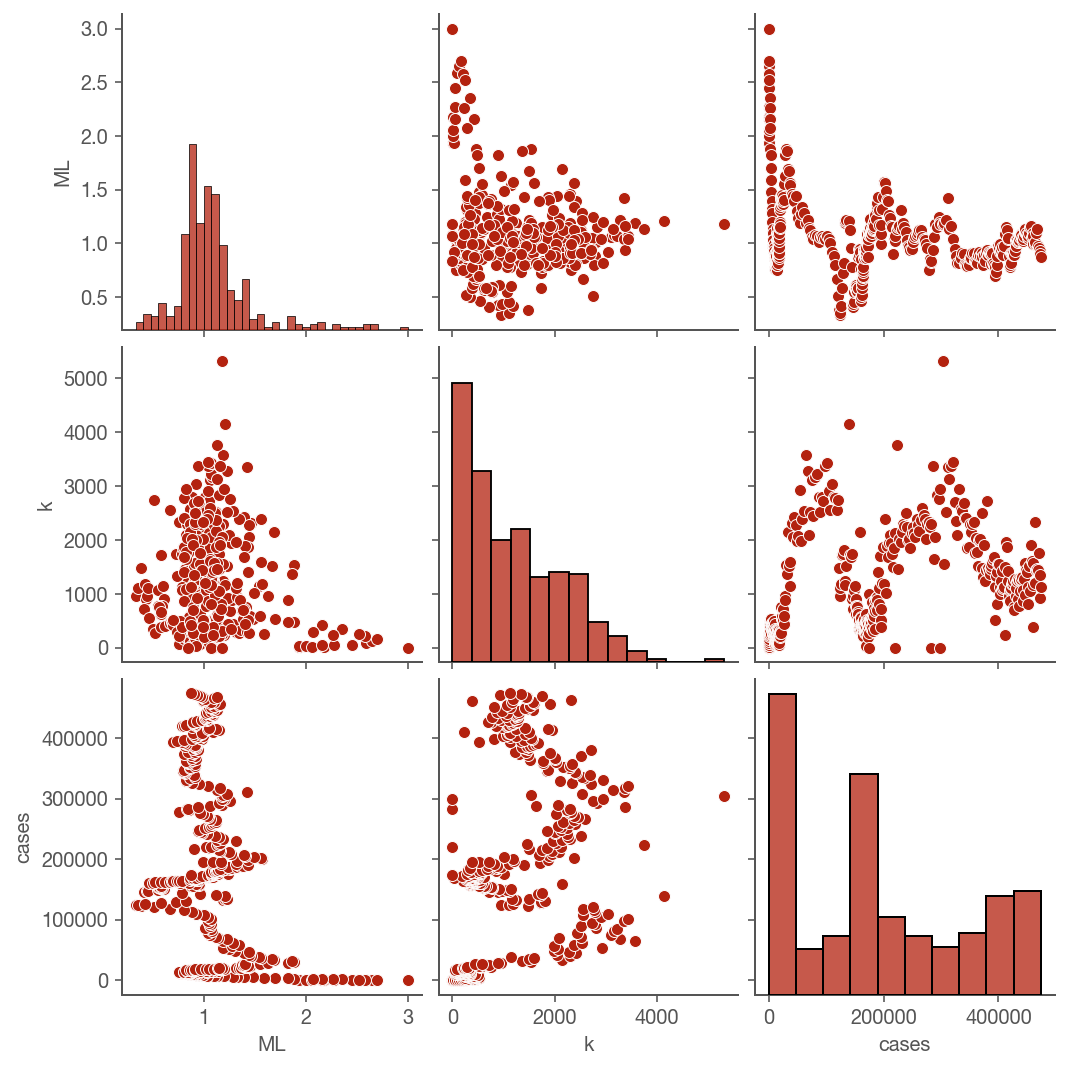

In [17]:
# sns.set(rc={"figure.figsize": (40, 28)})
#sns.set(font_scale=1)  # crazy big
g = sns.pairplot(miami, vars=["ML", "k", "cases"], palette="husl")

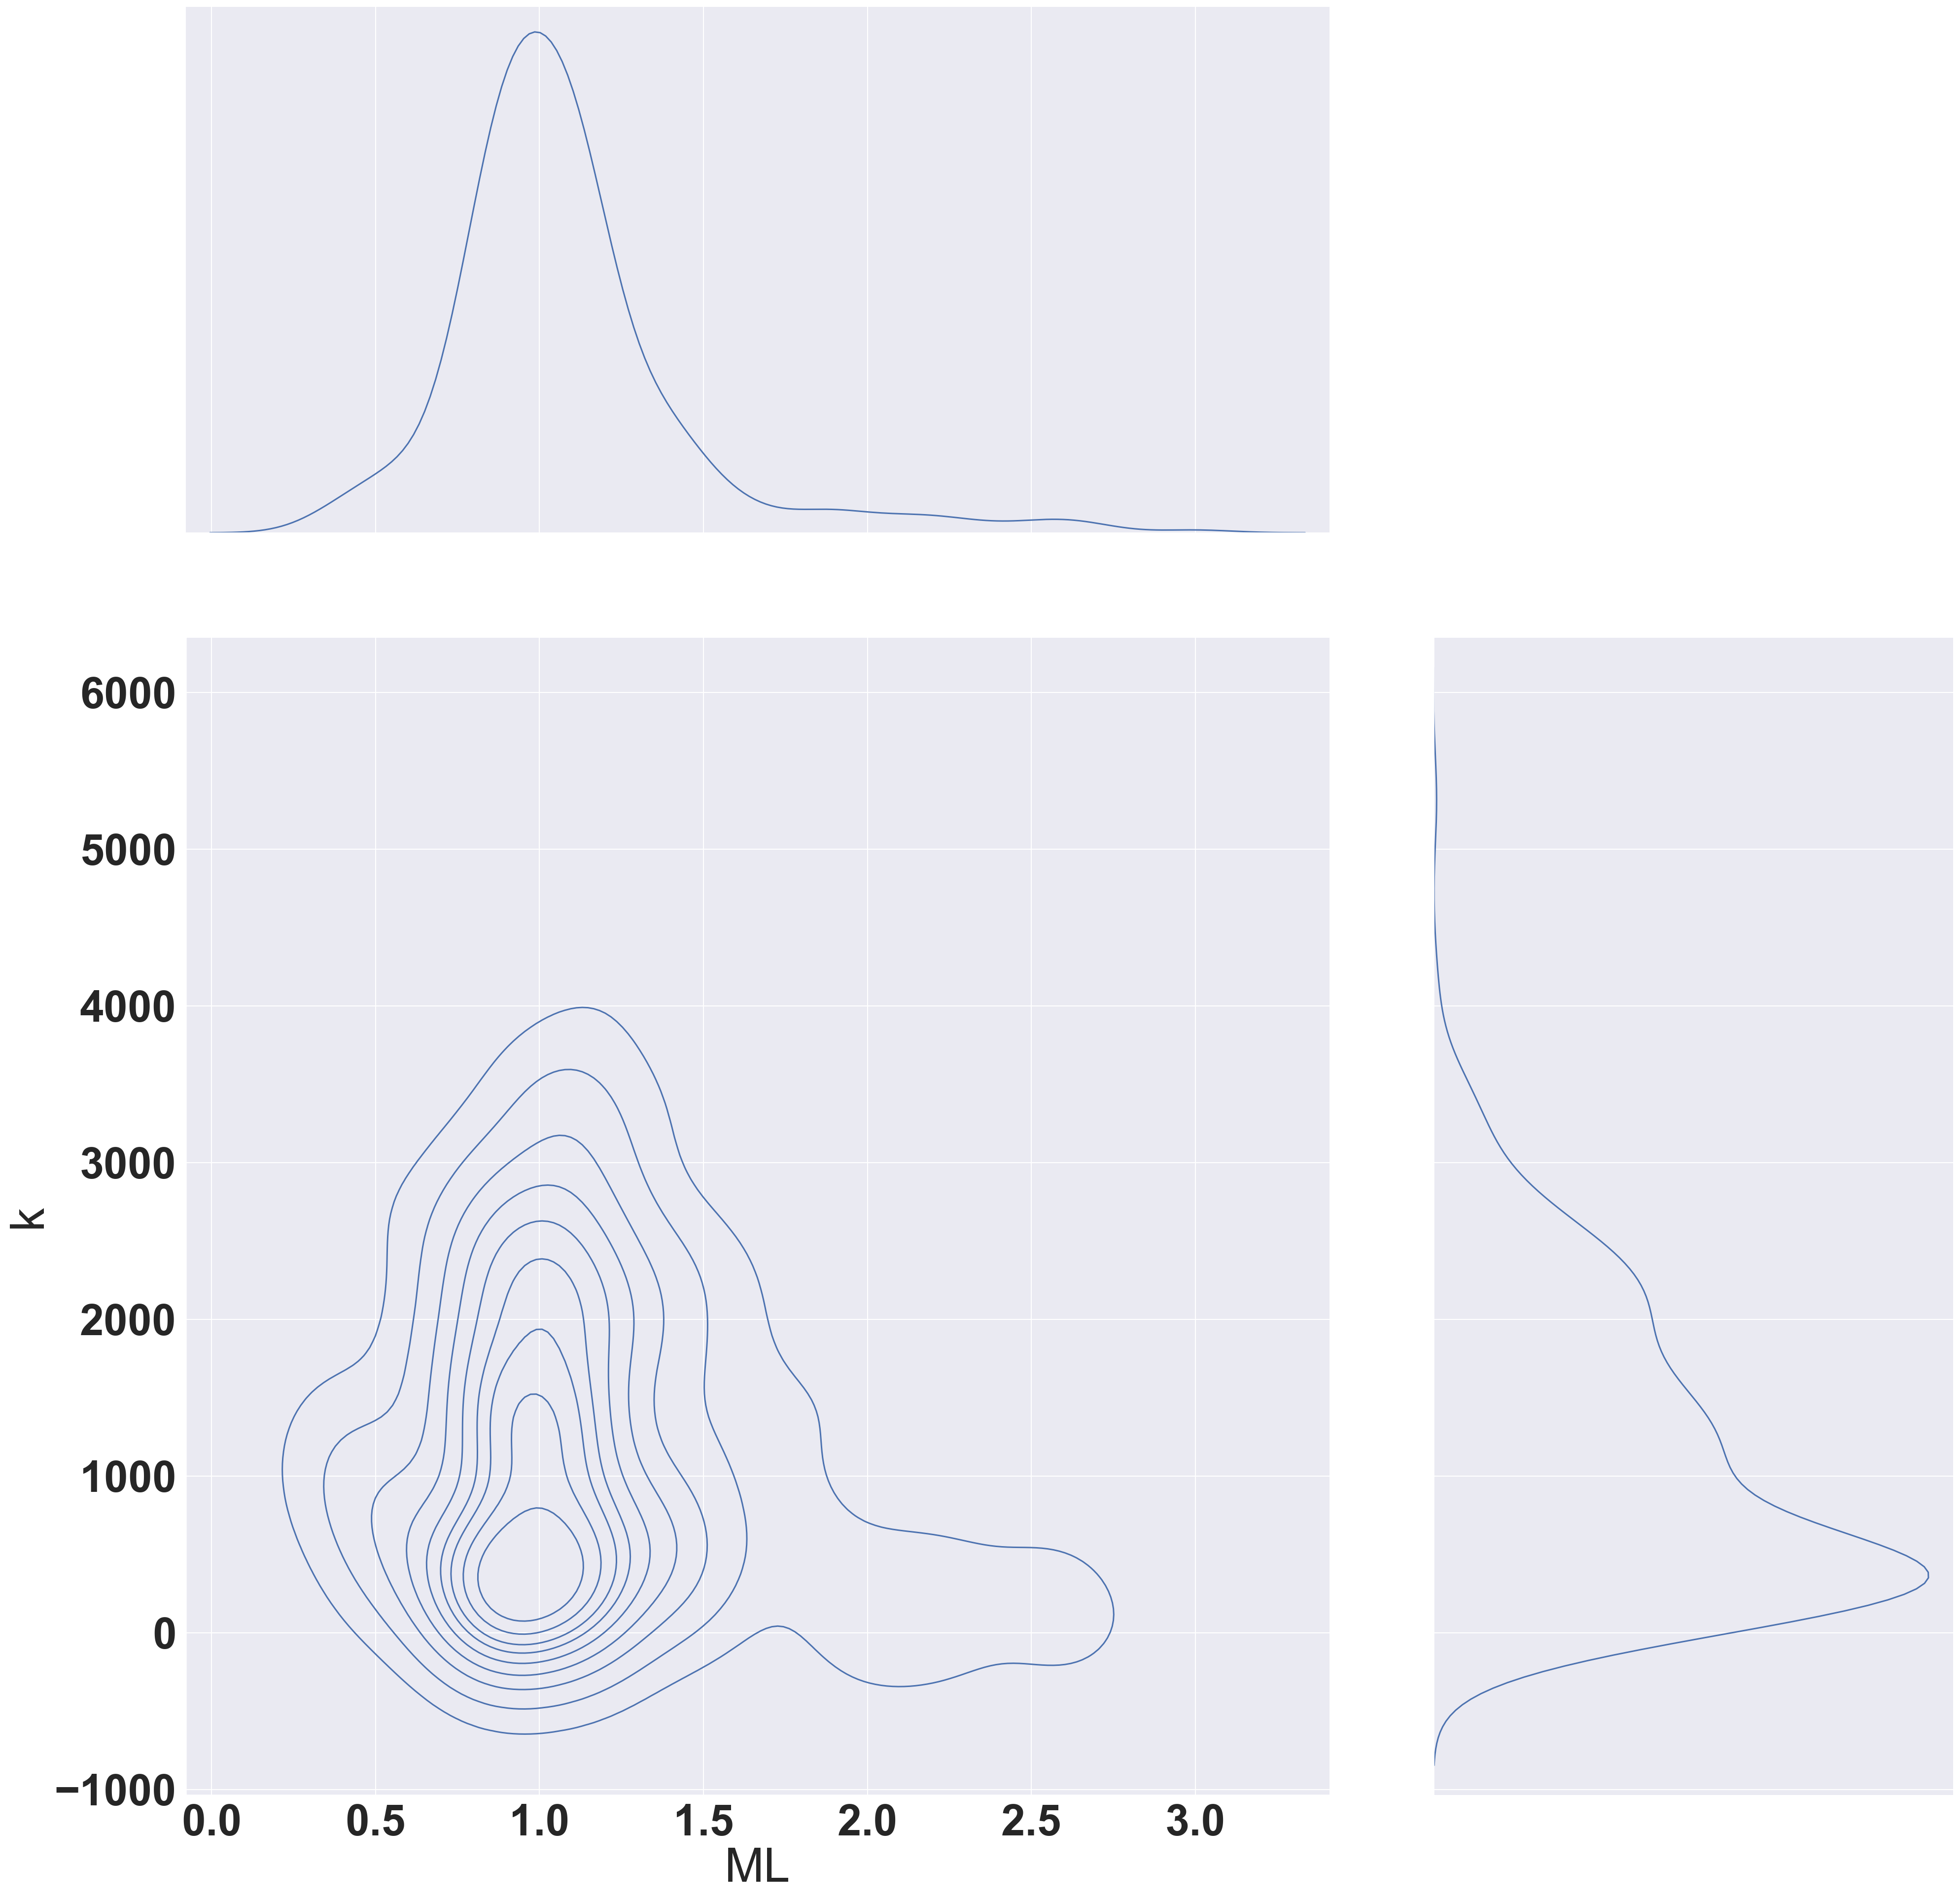

In [18]:
sns.set(font_scale=4)  # crazy big
sns.jointplot(x="ML", y="k", data=miami, kind="kde", height=28, ratio=2)

I coded the $\text{rt_validity}$ like this because I want the probability that the outcome is 0

In [19]:
k_list = list(miami["k"])

ml_list = list(miami["ML"])

k_decrease = []

for elem in k_list:
    if elem < k_list[k_list.index(elem) - 1]:
        k_decrease.append(1)
    else:
        k_decrease.append(0)

ml_decrease = []

for elem in ml_list:
    if elem < ml_list[ml_list.index(elem) - 1]:
        ml_decrease.append(1)
    else:
        ml_decrease.append(0)


rt_validity = []

for x, y in zip(k_decrease, ml_decrease):
    if x == y:
        rt_validity.append(1)
    else:
        rt_validity.append(0)


miami["rt_validity"] = rt_validity
miami["ml_decrease"] = ml_decrease
miami["k_decrease"] = k_decrease

In [20]:
miami.tail(39)

,date,county,cases,k,deaths,ML,Low_90,High_90,Low_50,High_50,rt_validity,ml_decrease,k_decrease
364,2021-03-14,Miami-Dade,426899,751.0,5660.0,0.89,0.73,1.06,0.84,0.98,0,0,1
365,2021-03-15,Miami-Dade,427599,700.0,5669.0,0.89,0.73,1.06,0.84,0.98,0,0,1
366,2021-03-16,Miami-Dade,428872,1273.0,5688.0,0.93,0.77,1.10,0.88,1.02,0,1,0
367,2021-03-17,Miami-Dade,429833,961.0,5699.0,0.98,0.82,1.15,0.93,1.07,1,1,1
368,2021-03-18,Miami-Dade,430941,1108.0,5710.0,1.03,0.88,1.21,0.99,1.13,0,1,0
369,2021-03-19,Miami-Dade,432176,1235.0,5716.0,1.03,0.88,1.21,0.99,1.13,0,1,0
370,2021-03-20,Miami-Dade,433451,1275.0,5724.0,1.01,0.86,1.19,0.96,1.10,0,1,0
371,2021-03-21,Miami-Dade,434351,900.0,5725.0,1.01,0.86,1.19,0.96,1.10,1,1,1
372,2021-03-22,Miami-Dade,435134,783.0,5728.0,1.02,0.87,1.20,0.97,1.11,1,1,1
373,2021-03-23,Miami-Dade,436393,1259.0,5742.0,1.03,0.86,1.18,0.98,1.12,0,1,0


In [21]:
miami.set_index('date')

,county,cases,k,deaths,ML,Low_90,High_90,Low_50,High_50,rt_validity,ml_decrease,k_decrease
date,,,,,,,,,,,,
2020-03-15,Miami-Dade,13,5.0,0.0,3.00,1.01,6.99,2.04,4.45,0,0,1
2020-03-16,Miami-Dade,23,10.0,0.0,2.18,0.91,3.81,1.69,2.92,0,1,0
2020-03-17,Miami-Dade,43,20.0,0.0,1.93,0.90,3.24,1.55,2.54,0,1,0
2020-03-18,Miami-Dade,77,34.0,0.0,1.93,0.99,3.08,1.58,2.46,0,1,0
2020-03-19,Miami-Dade,101,24.0,0.0,2.00,1.12,3.03,1.69,2.49,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-17,Miami-Dade,468907,1444.0,6043.0,0.98,0.83,1.13,0.94,1.07,1,1,1
2021-04-18,Miami-Dade,470667,1760.0,6044.0,0.96,0.81,1.11,0.92,1.05,0,1,0
2021-04-19,Miami-Dade,471594,927.0,6049.0,0.93,0.78,1.08,0.89,1.02,1,1,1


In [22]:
# import datetime

fixed_dates_df = miami.copy()
fixed_dates_df["date"] = fixed_dates_df["date"].apply(pd.to_datetime)
fixed_dates_df = fixed_dates_df.set_index(fixed_dates_df["date"])
fixed_dates_df = fixed_dates_df[['cases']]
fixed_dates_df

,cases
date,
2020-03-15,13
2020-03-16,23
2020-03-17,43
2020-03-18,77
2020-03-19,101
...,...
2021-04-17,468907
2021-04-18,470667
2021-04-19,471594


<AxesSubplot:xlabel='date'>

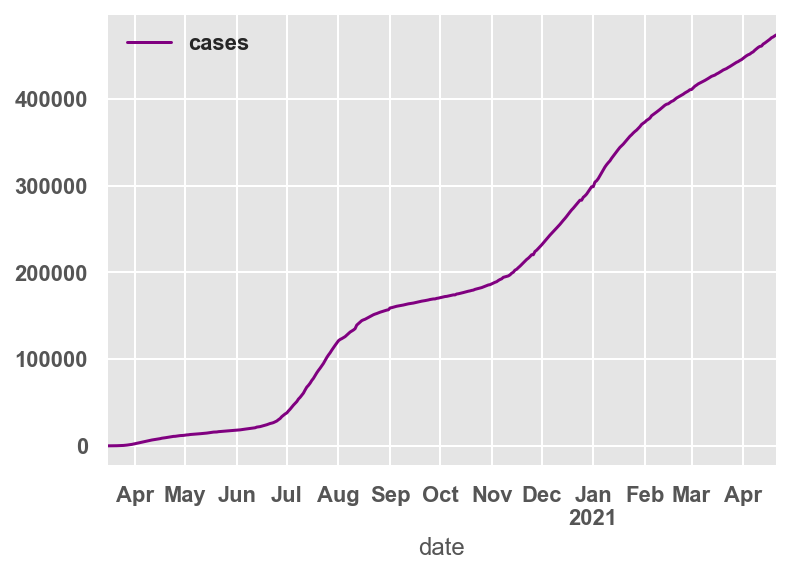

In [23]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
sns.set(font_scale=1)

register_matplotlib_converters()
plt.style.use("ggplot")
fixed_dates_df.plot(color="purple")

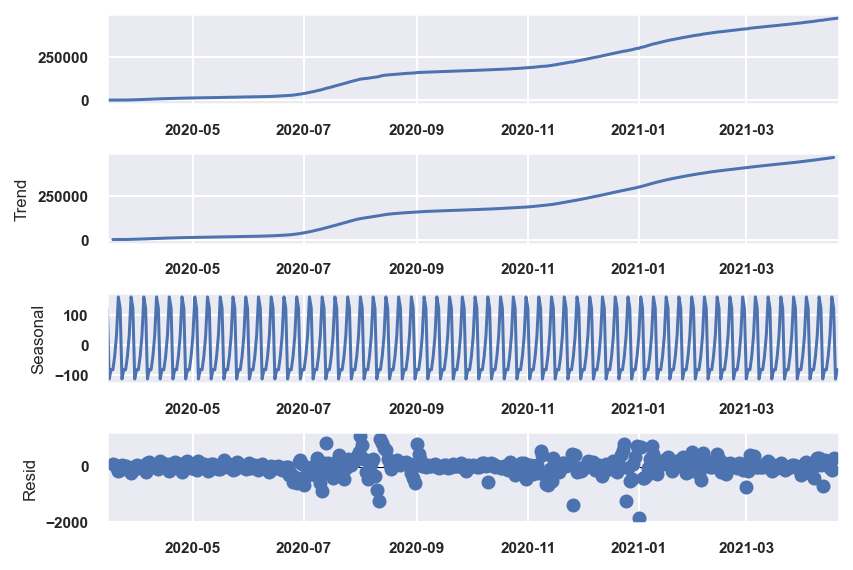

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(font_scale=0.7)
result = seasonal_decompose(fixed_dates_df)
fig = result.plot()

In [25]:
fixed_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 403 entries, 2020-03-15 to 2021-04-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   403 non-null    int64
dtypes: int64(1)
memory usage: 6.3 KB


In [26]:
from fbprophet import Prophet
model = Prophet()
train_df = fixed_dates_df.rename(columns={"cases":'y'})
train_df["ds"] = train_df.index
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


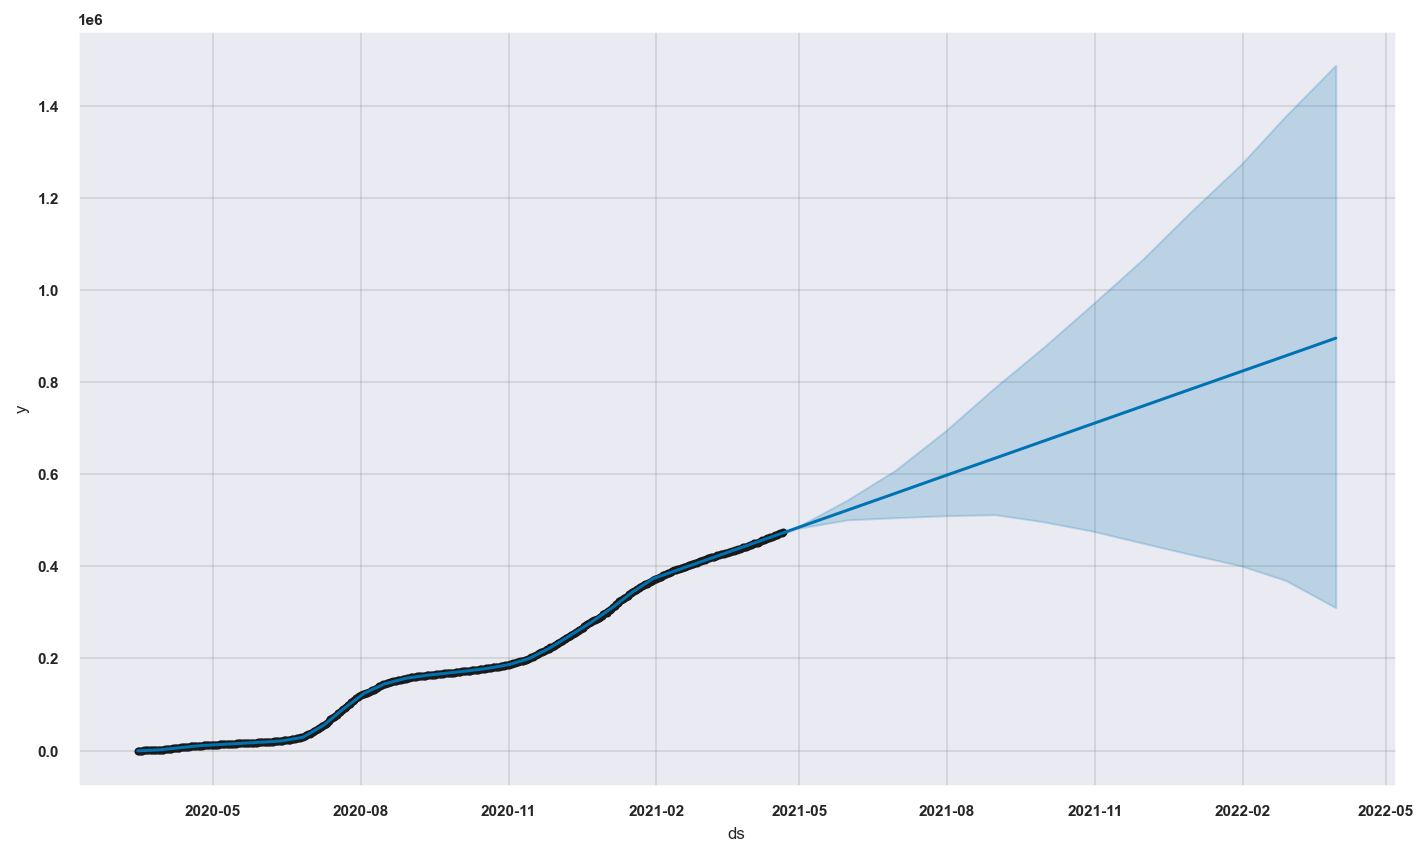

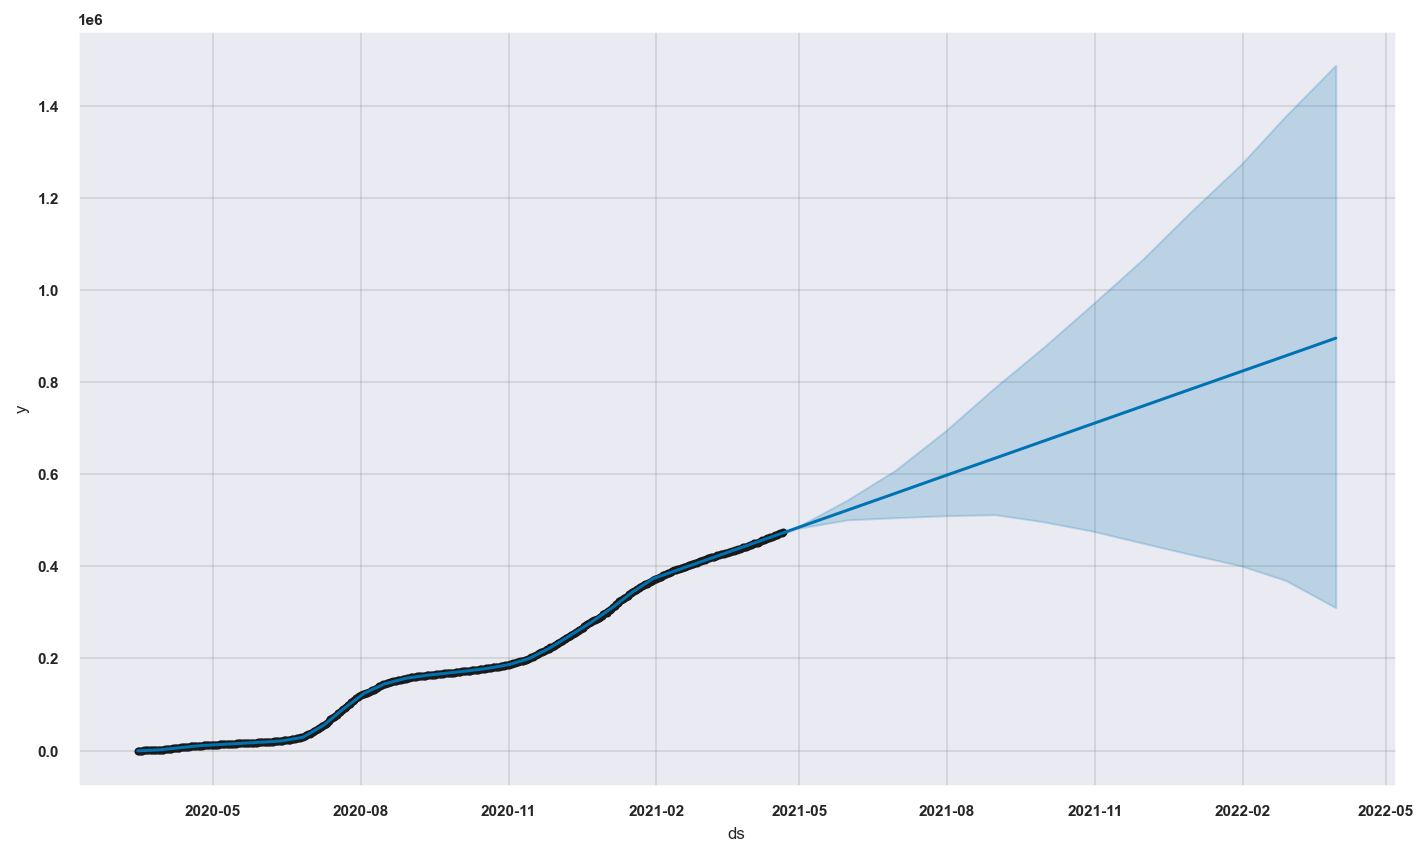

In [27]:
pd.plotting.register_matplotlib_converters()
future = model.make_future_dataframe(12, freq='M', include_history=True)
forecast = model.predict(future)
model.plot(forecast)

## OLS

$$k:= \text{new cases of COVID-19}$$

$$k_{\text{decrease}}:= 1 ~ \text{if} ~ k_t < k_{t-1}$$
$$\quad \text{else} ~ 0$$

$$ML:= \text{most likely} R_t \text{value}$$
$$ml_{\text{decrease}}:= 1 ~ \text{if} ~ ML_t < ML_{t-1}$$
$$\quad \text{else} ~  0$$

$$Low_{90} = \text{Low 90% probable range of ML}$$
$$High_{90} = \text{High 90% probable range of ML}$$
$$Low_{50} = \text{Low 50% probable range of ML}$$
$$High_{50} = \text{High 50% probable range of ML}$$

$$\theta = \text{unobserved variables}$$

$$k = \theta + ML + Low_{90} + High_{90} + Low_{50} + High_{50}$$

In [28]:
model = smf.ols("k ~ ML + Low_90 + High_90 + Low_50 + High_50", data=miami).fit()
print(model.summary2())

                     Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.387     
Dependent Variable:    k                  AIC:                  6467.7966 
Date:                  2021-04-22 23:12   BIC:                  6491.7902 
No. Observations:      403                Log-Likelihood:       -3227.9   
Df Model:              5                  F-statistic:          51.76     
Df Residuals:          397                Prob (F-statistic):   2.85e-41  
R-squared:             0.395              Scale:                5.3846e+05
--------------------------------------------------------------------------
             Coef.      Std.Err.     t    P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------
Intercept    1745.8812   120.0441 14.5437 0.0000    1509.8795    1981.8828
ML          19787.6441  4788.7026  4.1322 0.0000   10373.2587   29202.0294
Low_90      80750.4741  8045.6859 10.0365 0.000

In [29]:
miami["ols_pred"] = model.predict()

In [30]:
miami.tail(10)

,date,county,cases,k,deaths,ML,Low_90,High_90,Low_50,High_50,rt_validity,ml_decrease,k_decrease,ols_pred
393,2021-04-12,Miami-Dade,461040,388.0,5980.0,0.99,0.84,1.14,0.95,1.08,0,0,1,1295.065646
394,2021-04-13,Miami-Dade,463364,2324.0,5993.0,0.99,0.84,1.14,0.95,1.08,1,0,0,1295.065646
395,2021-04-14,Miami-Dade,464556,1192.0,5996.0,1.01,0.86,1.16,0.97,1.10,1,1,1,1307.961631
396,2021-04-15,Miami-Dade,465999,1443.0,6014.0,1.10,0.95,1.25,1.06,1.19,0,1,0,1365.993563
397,2021-04-16,Miami-Dade,467463,1464.0,6029.0,1.13,0.98,1.28,1.09,1.22,0,1,0,1385.337540
398,2021-04-17,Miami-Dade,468907,1444.0,6043.0,0.98,0.83,1.13,0.94,1.07,1,1,1,1288.617654
399,2021-04-18,Miami-Dade,470667,1760.0,6044.0,0.96,0.81,1.11,0.92,1.05,0,1,0,1275.721669
400,2021-04-19,Miami-Dade,471594,927.0,6049.0,0.93,0.78,1.08,0.89,1.02,1,1,1,1256.377692
401,2021-04-20,Miami-Dade,472940,1346.0,6058.0,0.90,0.76,1.07,0.85,0.98,0,1,0,1587.915715
402,2021-04-21,Miami-Dade,474068,1128.0,6059.0,0.87,0.73,1.04,0.82,0.95,1,1,1,1568.571737


## Logit Model

$$P(k_{\text{decrease}} ~|~ k + ml_{decrease})$$

In [31]:
logit = smf.logit("k_decrease ~ k + C(ml_decrease)", data=miami).fit()

Optimization terminated successfully.
         Current function value: 0.677232
         Iterations 4


In [32]:
print(logit.summary2())

                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.023    
Dependent Variable:  k_decrease        AIC:               551.8490 
Date:                2021-04-22 23:12  BIC:               563.8458 
No. Observations:    403               Log-Likelihood:    -272.92  
Df Model:            2                 LL-Null:           -279.28  
Df Residuals:        400               LLR p-value:       0.0017414
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      4.0000                                        
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept            0.3705   0.1953  1.8973 0.0578 -0.0122  0.7532
C(ml_decrease)[T.1]  0.0871   0.2048  0.4254 0.6705 -0.3143  0.4885
k                   -0.0004   0.0001 -3.4722 0.0005 -0.0006 -0.0002



In [33]:
print(logit.get_margeff(at="mean", method="dydx").summary())

        Logit Marginal Effects       
Dep. Variable:             k_decrease
Method:                          dydx
At:                              mean
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(ml_decrease)[T.1]     0.0218      0.051      0.425      0.671      -0.079       0.122
k                   -9.747e-05   2.81e-05     -3.473      0.001      -0.000   -4.25e-05


In [34]:
miami["logit_prob"] = logit.predict()
miami.tail()

,date,county,cases,k,deaths,ML,Low_90,High_90,Low_50,High_50,rt_validity,ml_decrease,k_decrease,ols_pred,logit_prob
398,2021-04-17,Miami-Dade,468907,1444.0,6043.0,0.98,0.83,1.13,0.94,1.07,1,1,1,1288.617654,0.473628
399,2021-04-18,Miami-Dade,470667,1760.0,6044.0,0.96,0.81,1.11,0.92,1.05,0,1,0,1275.721669,0.443040
400,2021-04-19,Miami-Dade,471594,927.0,6049.0,0.93,0.78,1.08,0.89,1.02,1,1,1,1256.377692,0.523996
401,2021-04-20,Miami-Dade,472940,1346.0,6058.0,0.90,0.76,1.07,0.85,0.98,0,1,0,1587.915715,0.483165
402,2021-04-21,Miami-Dade,474068,1128.0,6059.0,0.87,0.73,1.04,0.82,0.95,1,1,1,1568.571737,0.504415


In [35]:
miami["logit_pred"] = [0 if x < 0.5 else 1 for x in miami["logit_prob"]]
miami.tail()

,date,county,cases,k,deaths,ML,Low_90,High_90,Low_50,High_50,rt_validity,ml_decrease,k_decrease,ols_pred,logit_prob,logit_pred
398,2021-04-17,Miami-Dade,468907,1444.0,6043.0,0.98,0.83,1.13,0.94,1.07,1,1,1,1288.617654,0.473628,0
399,2021-04-18,Miami-Dade,470667,1760.0,6044.0,0.96,0.81,1.11,0.92,1.05,0,1,0,1275.721669,0.443040,0
400,2021-04-19,Miami-Dade,471594,927.0,6049.0,0.93,0.78,1.08,0.89,1.02,1,1,1,1256.377692,0.523996,1
401,2021-04-20,Miami-Dade,472940,1346.0,6058.0,0.90,0.76,1.07,0.85,0.98,0,1,0,1587.915715,0.483165,0
402,2021-04-21,Miami-Dade,474068,1128.0,6059.0,0.87,0.73,1.04,0.82,0.95,1,1,1,1568.571737,0.504415,1


In [36]:
cm = pd.crosstab(miami["rt_validity"], miami["logit_pred"], margins=True)
cm

logit_pred,0,1,All
rt_validity,,,
0,96,104,200
1,96,107,203
All,192,211,403


In [37]:
TN = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TP = cm[1][1]

accuracy = (TP + TN) / len(miami)
error = 1 - accuracy
sensitivity = TP / (FN + TP)
specificity = TN / (TN + FP)

print("Classification Statistics")
print("=========================")
print("Accuracy:\t", round(accuracy, 4))
print("Error:\t\t", round(error, 4))
print("Sensitivity:\t", round(sensitivity, 4))
print("Specificity:\t", round(specificity, 4))

Classification Statistics
Accuracy:	 0.5037
Error:		 0.4963
Sensitivity:	 0.5271
Specificity:	 0.48
